# Sentiment analysis on product reviews

Sentiment analysis (or opinion mining) is a natural language processing (NLP) technique used to determine whether data is positive, negative or neutral. Sentiment analysis is often performed on textual data to help businesses monitor brand and product sentiment in customer feedback, and understand customer needs.

**Objective: Determine what customer feedback is predicted positive and negative through NLP techniques**

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from sklearn.model_selection import train_test_split
import wordcloud #will use for the word cloud plot
from wordcloud import WordCloud, STOPWORDS # optional to filter out the stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn import naive_bayes
from sklearn.linear_model import LogisticRegression
from bs4 import BeautifulSoup
from sklearn.ensemble import RandomForestClassifier
from nltk.corpus import stopwords 
from __future__ import unicode_literals
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [192]:
df = pd.read_csv('/content/drive/MyDrive/ML Learning csv/redmi6.csv', encoding='cp1252')
df

,Review Title,Customer name,Rating,Date,Category,Comments,Useful
0,Another Midrange killer Smartphone by Xiaomi,Rishikumar Thakur,4,on 1 October 2018,Display,Another Midrange killer Smartphone by Xiaomi\n...,
1,vry small size mobile,Raza ji,3,on 15 September 2018,Others,All ok but vry small size mobile,7 people found this helpful
2,Full display not working in all application.,Vaibhav Patel,3,on 18 September 2018,Others,Quite good,7 people found this helpful
3,Value for Money,Amazon Customer,5,on 28 September 2018,Display,Redmi has always have been the the king of bud...,2 people found this helpful
4,Not worth for the money,Sudhakaran Wadakkancheri,2,on 18 September 2018,Others,worst product from MI. I am a hardcore fan of ...,6 people found this helpful
...,...,...,...,...,...,...,...
275,"Cemera quality,face unlock most important in t...",Rahul,5,on 19 September 2018,Others,"I like This Phone, Awesome look and design.\nI...",NaN
276,Mi is best phone,Sunil Soni,4,on 18 September 2018,Others,Product is avasome but invoice is note include...,NaN
277,Its a OK Phone,D.C.Padhi,3,on 15 September 2018,Battery,"Redmi Note4, Note5, now 6pro..It seems the old...",NaN
278,Redmi,Mahesh,5,on 21 September 2018,Others,I love mi,NaN


In [193]:
df.columns

Index(['Review Title', 'Customer name', 'Rating', 'Date', 'Category',
       'Comments', 'Useful'],
      dtype='object')

In [194]:
# Adding a sentiment column to classify reviews as Positive or Negative
# Positive = 1
# Negative = 0

df['sentiment'] = np.where(df['Rating'] == 5.0, 1,
                           np.where(df['Rating'] == 4.0, 1, 0))
df

,Review Title,Customer name,Rating,Date,Category,Comments,Useful,sentiment
0,Another Midrange killer Smartphone by Xiaomi,Rishikumar Thakur,4,on 1 October 2018,Display,Another Midrange killer Smartphone by Xiaomi\n...,,1
1,vry small size mobile,Raza ji,3,on 15 September 2018,Others,All ok but vry small size mobile,7 people found this helpful,0
2,Full display not working in all application.,Vaibhav Patel,3,on 18 September 2018,Others,Quite good,7 people found this helpful,0
3,Value for Money,Amazon Customer,5,on 28 September 2018,Display,Redmi has always have been the the king of bud...,2 people found this helpful,1
4,Not worth for the money,Sudhakaran Wadakkancheri,2,on 18 September 2018,Others,worst product from MI. I am a hardcore fan of ...,6 people found this helpful,0
...,...,...,...,...,...,...,...,...
275,"Cemera quality,face unlock most important in t...",Rahul,5,on 19 September 2018,Others,"I like This Phone, Awesome look and design.\nI...",NaN,1
276,Mi is best phone,Sunil Soni,4,on 18 September 2018,Others,Product is avasome but invoice is note include...,NaN,1
277,Its a OK Phone,D.C.Padhi,3,on 15 September 2018,Battery,"Redmi Note4, Note5, now 6pro..It seems the old...",NaN,0
278,Redmi,Mahesh,5,on 21 September 2018,Others,I love mi,NaN,1


### Data Exploration

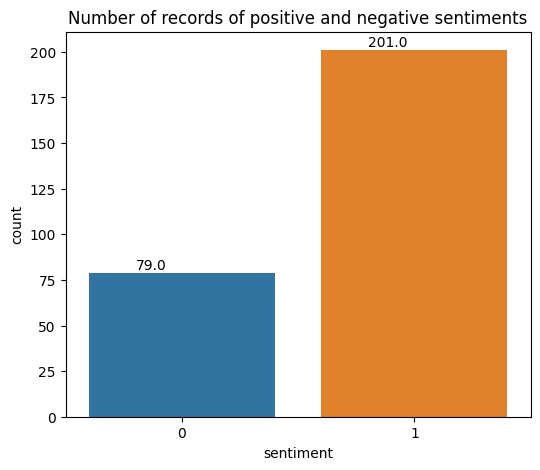

In [195]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.figure(figsize=(6,5))
plt.title("Number of records of positive and negative sentiments")
plot = sn.countplot(x = 'sentiment', data=df)

for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+0.2 ,p.get_height()+2))

In [196]:
df.dtypes

Review Title     object
Customer name    object
Rating            int64
Date             object
Category         object
Comments         object
Useful           object
sentiment         int64
dtype: object

Review Counts Per Category

In [197]:
Category = df['Category'].str.upper()
Category.value_counts().head(10)

OTHERS      180
DISPLAY      36
BATTERY      29
CAMERA       28
DELIVERY      7
Name: Category, dtype: int64

Word cloud

Trying to indicates the frequency of popular words.

In [198]:
text = df.Comments[0]

In [199]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

In [200]:
#To build a wordcloud, we have to remove NULL values first:
df["Comments"] = df["Comments"].fillna(value="")

In [201]:
#Now let's add a string value instead to make our Series clean:
word_string=" ".join(df['Comments'].str.lower())

#word_string

(-0.5, 1599.5, 799.5, -0.5)

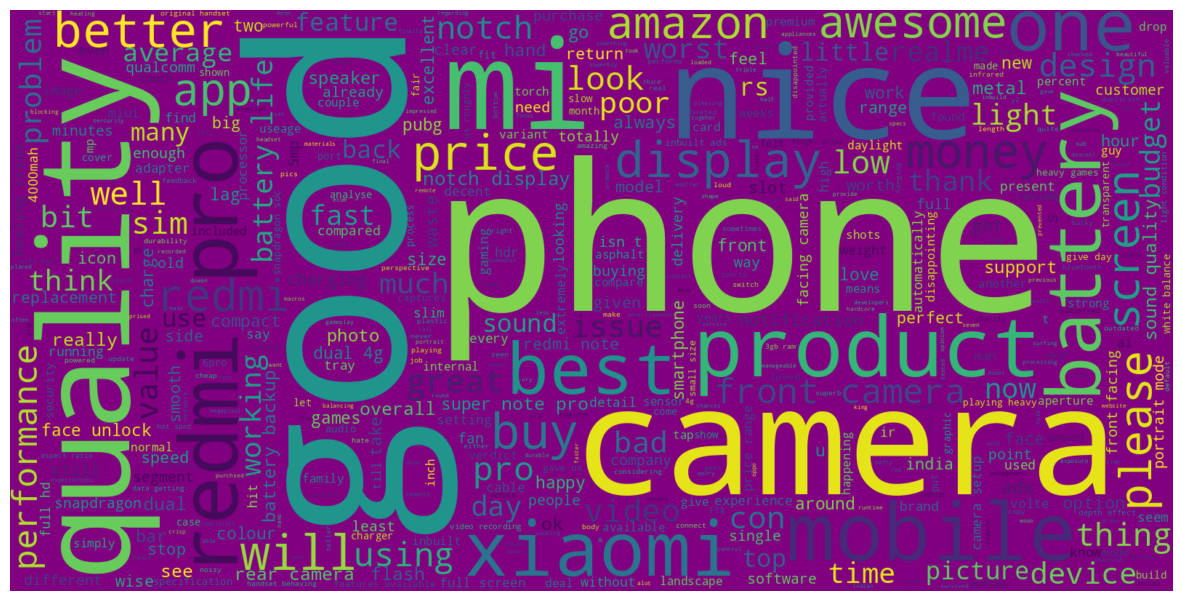

In [202]:
#And - plotting:

plt.figure(figsize=(15,15))
wc = WordCloud(background_color="purple", stopwords = STOPWORDS, max_words=500, max_font_size= 300,  width=1600, height=800)
wc.generate(word_string)

plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), interpolation="bilinear")
plt.axis('off')

Sentiment Intensity Analyzer

This analyzer uses a combination of features (e.g., words) which are generally labeled according to their semantic orientation as either positive,neutral or negative. It not only tells us about the score but also tells us about how far from very positive to very negative a sentiment is.

In [203]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.downloader.download('vader_lexicon')
sample_review = Reviews[:10] 

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [204]:
sentiment = SentimentIntensityAnalyzer()

In [205]:
for sentences in sample_review:
    sentences
    ss = sentiment.polarity_scores(sentences)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]))
    print(sentences) 

compound: 0.9981, 
neg: 0.04, 
neu: 0.818, 
pos: 0.142, 
Another Midrange killer Smartphone by Xiaomi

Major Highlights:
• The Redmi 6 Pro sports a 5.84-inch full-HD+ display with a notch
• Powered by the Qualcomm Snapdragon 625 SoC
• The phone is priced at Rs. 10,999 for the 3GB RAM variant (Start Point)
• Battery of 4000 mAh and its Durability
• The Tripple Slots
• Dual AI Camera

Well in Redmi 6 Series you will get 3 Different Smartphones with different specs, and from all of them, Redmi 6 pro is most powerful and advanced (as said by Redmi India in their launch event).

Xiaomi Redmi 6 Pro design:
Being the most premium phone of the new Redmi 6 family, the Redmi 6 Pro has been given somewhat better materials, in the form of a metal backplate. However, the overall design isn’t too different from what we’ve already seen from Xiaomi at around this price point. This is a fairly thick phone, and it's a bit hefty too, but it’s manageable. The buttons have good feedback without being noisy

The Compound score is a metric that calculates the sum of all ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive).
*   positive sentiment : (compound score >= 0.05) 
*   neutral sentiment : (compound score > -0.05) and (compound score < 0.05) 
*   negative sentiment : (compound score <= -0.05)

Split data-set to train and test

In [206]:
#Split data-set to train and test

from sklearn.model_selection import train_test_split

X = df['Comments']
Y = df['sentiment']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

Data cleaning

In [207]:
# function to remove html elements from the reviews
def removeHTML(raw_text):
    clean_HTML = BeautifulSoup(raw_text, 'lxml').get_text() 
    return clean_HTML

In [208]:
# function to remove special characters and numbers from the reviews4961
def removeSpecialChar(raw_text):
    clean_SpecialChar = re.sub("[^a-zA-Z]", " ", raw_text)  
    return clean_SpecialChar

In [209]:
# function to convert all reviews into lower case
def toLowerCase(raw_text):
    clean_LowerCase = raw_text.lower().split()
    return( " ".join(clean_LowerCase))  

In [210]:
# function to remove stop words from the reviews
def removeStopWords(raw_text):
    stops = set(stopwords.words("english"))
    words = [w for w in raw_text if not w in stops]
    return( " ".join(words))

In [211]:
# X_training clean set
X_train_cleaned = []

for val in X_train:
    val = removeHTML(val)
    val = removeSpecialChar(val)
    val = toLowerCase(val)
    removeStopWords(val) 
    X_train_cleaned.append(val) 

<ipython-input-207-c0f252bc04f4>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  clean_HTML = BeautifulSoup(raw_text, 'lxml').get_text()


In [212]:
# X_testing clean set
X_test_cleaned = []

for val in X_test:
    val = removeHTML(val)
    val = removeSpecialChar(val)
    val = toLowerCase(val)
    removeStopWords(val)
    X_test_cleaned.append(val) 

In [213]:
# Convert a collection of raw documents to a matrix of TF-IDF features. This is required so as to train the model using features instead of 
# raw strings.
tvec = TfidfVectorizer(use_idf=True,
strip_accents='ascii')

X_train_tvec = tvec.fit_transform(X_train_cleaned)

### Data Modelling

Random Forest

In [225]:
# Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train_tvec, Y_train)

RandomForestClassifier()

In [226]:
# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers 
ranfrst_predictions = rf.predict(tvec.transform(X_test_cleaned))
report = classification_report(Y_test,ranfrst_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
cm = sns.light_palette("red", as_cmap=True)
data_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
0,0.570000,0.670000,0.620000,12.000000
1,0.900000,0.860000,0.880000,44.000000
accuracy,0.820000,0.820000,0.820000,0.820000
macro avg,0.740000,0.770000,0.750000,56.000000
weighted avg,0.830000,0.820000,0.830000,56.000000


The Model is classifying with moderate accuracy. Average Precision is 74% and average recall is about 77% for identifying positive and negative sentiment documents. Let us draw the confusion matrix

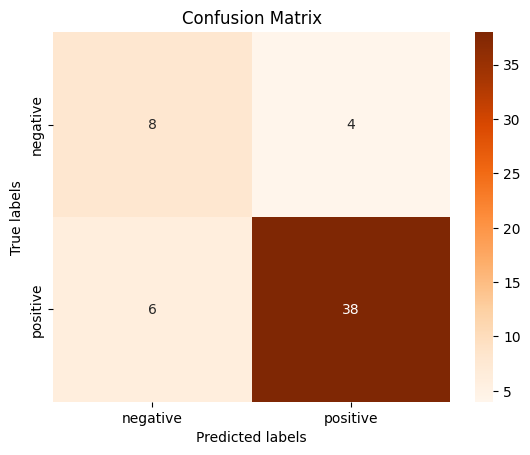

In [227]:
# confusion matrix
ranfrst_predictions=rf.predict(tvec.transform(X_test_cleaned))
ax= plt.subplot()
cm=confusion_matrix(Y_test,ranfrst_predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Oranges');  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

As per the model prediction, that there are only 6 instances that are wrongly classified as a negative sentiment document and there are only 4 negative sentiment documents classified wrongly as positive sentiment documents. Rest all have been classified correctly.

In [228]:
# testing the model with sample 'Negative' review
demo_review = np.array(['Do not buy. Fake Product.'])
demo_review_X_test = tvec.transform(demo_review)
print(rf.predict(demo_review_X_test))


[0]


In [229]:
# testing the model with sample 'Positive' review
demo_review_2 = np.array(['Original Product. Great Performance.'])
demo_review_X_test_2 = tvec.transform(demo_review_2)
print(rf.predict(demo_review_X_test_2))


[1]


Logistic regression model

In [230]:
# Logistic regression model
lr = LogisticRegression()
lr.fit(X_train_tvec, Y_train)

LogisticRegression()

In [231]:
# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers 
lr_predictions = lr.predict(tvec.transform(X_test_cleaned))
report = classification_report(Y_test,lr_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
cm = sns.light_palette("purple", as_cmap=True)
data_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
0,0.780000,0.580000,0.670000,12.000000
1,0.890000,0.950000,0.920000,44.000000
accuracy,0.880000,0.880000,0.880000,0.880000
macro avg,0.840000,0.770000,0.790000,56.000000
weighted avg,0.870000,0.880000,0.870000,56.000000


The Model is classifying with good accuracy. Average Precision is 84% and average recall is about 77% for identifying positive and negative sentiment documents. Let us draw the confusion matrix

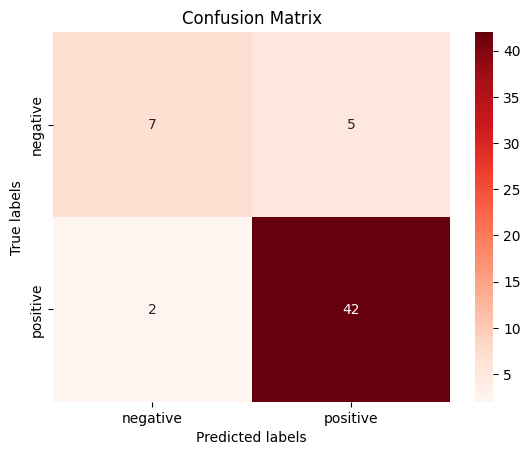

In [232]:
# confusion matrix
lr_predictions=lr.predict(tvec.transform(X_test_cleaned))
ax= plt.subplot()
cm=confusion_matrix(Y_test,lr_predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Reds');  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

As per the model prediction, that there are only 2 instances that are wrongly classified as a negative sentiment document and there are only 5 negative sentiment documents classified wrongly as positive sentiment documents. Rest all have been classified correctly.

In [233]:
# Testing the model with sample 'Negative' review
demo_review = np.array(['Poor quality. Faulty device.'])
demo_review_X_test = tvec.transform(demo_review)
print(lr.predict(demo_review_X_test))


[1]


In [234]:
# testing the model with sample 'Positive' review
demo_review_2 = np.array(['Best product.'])
demo_review_X_test_2 = tvec.transform(demo_review_2)
print(lr.predict(demo_review_X_test_2))


[1]


Conclusion

Of the two models the Logistic regression model gives us better results as it's accuracy rate is 88% and has only 7 false predictions in total